# Sentiment Analysis of Movie Reviews Using LSTM 

## Import Library

In [1]:
import seaborn as sns
import keras
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Embedding
from keras.layers import LSTM
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

## Import IMDB Dataset

First, let's import the dataset. The IMDb movie reviews dataset is already provided in Keras, so we can import it directly

In [2]:
from keras.datasets import imdb

The `load_data` function returns two tuples as the output. The first tuple holds the training set, while the second tuple holds the testing set. Note that the `load_data` function splits the data equally and randomly into training and testing sets.

`num_words`: defined as the maximum number of unique words to be loaded. Only the n most common unique words (as they appear in the dataset) will be loaded. If n is small, the training time will be faster at the expense of accuracy. Let's set `num_words` = 10000.

In [3]:
training_set, testing_set = imdb.load_data(num_words = 10000)
X_train, y_train = training_set
X_test, y_test = testing_set

Let's do a quick check to see the amount of data we have:

In [4]:
print("Number of training samples = {}".format(X_train.shape[0]))
print("Number of testing samples = {}".format(X_test.shape[0]))

Number of training samples = 25000
Number of testing samples = 25000


## Zero Padding

Before we can use the data as input to our neural network, we need to address an issue. We know that movie reviews have different lengths, and therefore the input vectors have different sizes. This is an issue, as neural networks only accept fixed-size vectors. To address this issue, we are going to define a `maxlen` parameter. The `maxlen` parameter
shall be the maximum length of each movie review. Reviews that are longer than `maxlen` will be truncated, and reviews that are shorter than `maxlen` will be padded with zeros. Using zero padding, we ensure that the input will have a fixed vector length.

In [5]:
X_train_padded = pad_sequences(X_train, maxlen= 100)
X_test_padded = pad_sequences(X_test, maxlen= 100)

print("X_train vector shape = {}".format(X_train_padded.shape))
print("X_test vector shape = {}".format(X_test_padded.shape))

X_train vector shape = (25000, 100)
X_test vector shape = (25000, 100)


## Word embedding and LSTM layers

With our input preprocessed, we can now turn our attention to model building. We will use the Sequential class in Keras to build our model. The Sequential class allows us to stack layers on top of one another, making it really easy to build complex models layer by layer.

First define a new `Sequential` class:
> model = Sequential()

Next, we can add the word embedding layer to our model. The `Embedding` class takes the following important arguments:
* `input_dim`: The input dimensions of the word embedding layer. This should be the same as the `num_words` parameter that we used when we loaded in our data. Essentially, this is the maximum number of unique words in our dataset.
* `output_dim`: The output dimensions of the word embedding layer. This should be a hyperparameter to be fine-tuned. For now, let's use a value of `128`.

Similarly, we can add a `LSTM` layer to our model. The `LSTM` class takes the following important arguments:
* `units`: This refers to the number of recurring units in the `LSTM` layer. A larger number of units results in a more complex model, at the expense of training time and overfitting. For now, let's use a typical value of `128` for the number of units.
* `activation`: This refers to the type of activation function applied to the cell state and the hidden state. The default value is the tanh function.
* `recurrent_activation`: This refers to the type of activation function applied to the forget, input, and output gates. The default value is the `sigmoid` function.

Finally, we add a `Dense` layer with `sigmoid` as the `activation` function. The purpose of this layer is to ensure that the output of our model has a value between 0 and 1, representing the probability that the movie review is positive. The `Dense` layer is the final layer in our neural network. 

With the model building complete, we're ready to compile and train our model. We can compile our model as follows:
> model.compile(loss='binary_crossentropy', optimizer = Optimizer, metrics=['accuracy'])

and train our model for 10 epochs, using the testing set as the validation data. We can do so as follows:
> scores = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

In [6]:
def train_model(Optimizer, X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(Embedding(input_dim = 10000, output_dim = 128))
    model.add(LSTM(units=128))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = Optimizer, metrics=['accuracy'])
    scores = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))
    return scores, model



## Analyzing the results

Let's plot the validation accuracy per epoch for the three different models. First, we plot for the model trained using the `sgd` optimizer:

In [7]:
# Train Model
SGD_score, SGD_model = train_model(Optimizer = 'sgd', X_train=X_train_padded, y_train=y_train, X_val=X_test_padded, y_val=y_test)

Epoch 1/10
196/196 [==============================] - 45s 208ms/step - loss: 0.6929 - accuracy: 0.5108 - val_loss: 0.6929 - val_accuracy: 0.5173
Epoch 2/10
196/196 [==============================] - 49s 251ms/step - loss: 0.6929 - accuracy: 0.5178 - val_loss: 0.6928 - val_accuracy: 0.5224
Epoch 3/10
196/196 [==============================] - 60s 307ms/step - loss: 0.6928 - accuracy: 0.5223 - val_loss: 0.6927 - val_accuracy: 0.5280
Epoch 4/10
196/196 [==============================] - 48s 248ms/step - loss: 0.6927 - accuracy: 0.5214 - val_loss: 0.6927 - val_accuracy: 0.5309
Epoch 5/10
196/196 [==============================] - 48s 245ms/step - loss: 0.6926 - accuracy: 0.5308 - val_loss: 0.6926 - val_accuracy: 0.5262
Epoch 6/10
196/196 [==============================] - 47s 242ms/step - loss: 0.6925 - accuracy: 0.5318 - val_loss: 0.6925 - val_accuracy: 0.5297
Epoch 7/10
196/196 [==============================] - 51s 259ms/step - loss: 0.6924 - accuracy: 0.5260 - val_loss: 0.6924 - val_ac

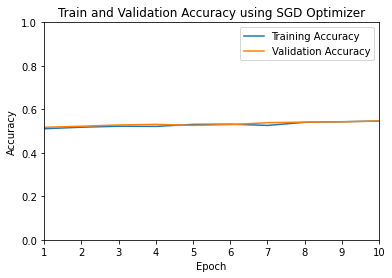

In [8]:
plt.plot(range(1,11), SGD_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), SGD_score.history['val_accuracy'],
label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using SGD Optimizer')
plt.legend()
plt.show()

From the ouput we can see that the training and validation accuracy is stuck at around 50%. Essentially, this shows that the training has failed and our neural network performs no better than a random coin toss. Clearly, the sgd optimizer is not suitable for this dataset and this LSTM network.

Next, we plot the training and validation accuracy for the model trained using the RMSprop optimizer

In [9]:
# Train Model
RMSprop_score, RMSprop_model = train_model(Optimizer = 'RMSprop', X_train=X_train_padded, y_train=y_train, X_val=X_test_padded, y_val=y_test)

Epoch 1/10
196/196 [==============================] - 69s 330ms/step - loss: 0.4764 - accuracy: 0.7744 - val_loss: 0.3429 - val_accuracy: 0.8487
Epoch 2/10
196/196 [==============================] - 42s 213ms/step - loss: 0.3108 - accuracy: 0.8708 - val_loss: 0.4026 - val_accuracy: 0.8311
Epoch 3/10
196/196 [==============================] - 39s 200ms/step - loss: 0.2618 - accuracy: 0.8958 - val_loss: 0.3587 - val_accuracy: 0.8462
Epoch 4/10
196/196 [==============================] - 36s 186ms/step - loss: 0.2243 - accuracy: 0.9127 - val_loss: 0.3677 - val_accuracy: 0.8478
Epoch 5/10
196/196 [==============================] - 39s 198ms/step - loss: 0.1934 - accuracy: 0.9266 - val_loss: 0.4308 - val_accuracy: 0.8290
Epoch 6/10
196/196 [==============================] - 37s 187ms/step - loss: 0.1658 - accuracy: 0.9398 - val_loss: 0.4849 - val_accuracy: 0.8292
Epoch 7/10
196/196 [==============================] - 36s 185ms/step - loss: 0.1439 - accuracy: 0.9458 - val_loss: 0.4935 - val_ac

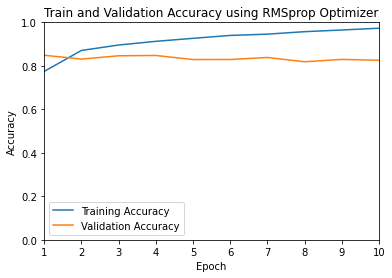

In [10]:
plt.plot(range(1,11), RMSprop_score.history['accuracy'],label='Training Accuracy')
plt.plot(range(1,11), RMSprop_score.history['val_accuracy'],label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.legend()
plt.show()

From the ouput we can see that within 10 epochs, our model is able to achieve a training accuracy of more than 95% and a validation accuracy of around 85%. Clearly, the RMSprop optimizer performs better than the sgd optimizer for this task.

Finally, let's try the adam optimizer and see how it performs.

In [11]:
# Train Model
Adam_score, Adam_model = train_model(Optimizer = 'adam', X_train=X_train_padded, y_train=y_train, X_val=X_test_padded, y_val=y_test)

Epoch 1/10
196/196 [==============================] - 62s 289ms/step - loss: 0.4464 - accuracy: 0.7819 - val_loss: 0.3651 - val_accuracy: 0.8421
Epoch 2/10
196/196 [==============================] - 40s 204ms/step - loss: 0.2642 - accuracy: 0.8959 - val_loss: 0.3838 - val_accuracy: 0.8462
Epoch 3/10
196/196 [==============================] - 43s 221ms/step - loss: 0.1962 - accuracy: 0.9250 - val_loss: 0.3920 - val_accuracy: 0.8444
Epoch 4/10
196/196 [==============================] - 38s 196ms/step - loss: 0.1408 - accuracy: 0.9493 - val_loss: 0.5180 - val_accuracy: 0.8281
Epoch 5/10
196/196 [==============================] - 37s 187ms/step - loss: 0.1061 - accuracy: 0.9633 - val_loss: 0.5284 - val_accuracy: 0.8331
Epoch 6/10
196/196 [==============================] - 36s 185ms/step - loss: 0.0897 - accuracy: 0.9688 - val_loss: 0.5647 - val_accuracy: 0.8262
Epoch 7/10
196/196 [==============================] - 38s 192ms/step - loss: 0.0705 - accuracy: 0.9766 - val_loss: 0.6503 - val_ac

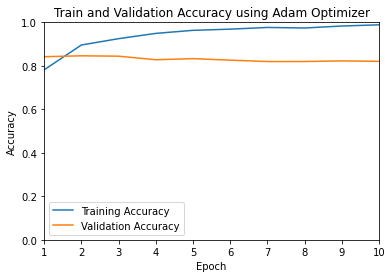

In [12]:
plt.plot(range(1,11), Adam_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), Adam_score.history['val_accuracy'],label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using Adam Optimizer')
plt.legend()
plt.show()

The adam optimizer does pretty well. From the graph, we can see that the Training Accuracy is almost 100% after 10 epochs, while the Validation Accuracy is
around 80%. This gap of 20% suggests that overfitting is happening when the adam optimizer is used.

By contrast, the gap between training and validation accuracy is smaller for the RMSprop optimizer. Hence, we conclude that the RMSprop optimizer is the most optimal for this
dataset and the LSTM network, and we shall use the model built using the RMSprop optimizer from this point onward.

## Confusion Matrix

The confusion matrix is a useful visualization tool to evaluate the performance of our model. Let's use the confusion matrix to evaluate the performance of our model in this project.

To recap, these are the definitions of the terms in the confusion matrix:
* **True negative**: The actual class is negative (negative sentiment), and the model also predicted negative
* **False positive**: The actual class is negative (negative sentiment), but the model predicted positive
* **False negative**: The actual class is positive (positive sentiment), but the model predicted negative
* **True positive**: The actual class is positive (positive sentiment), and the model predicted positive

We want our false positive and false negative numbers to be as low as possible, and for the true negative and true positive numbers to be as high as possible.

782/782 [==============================] - 19s 22ms/step


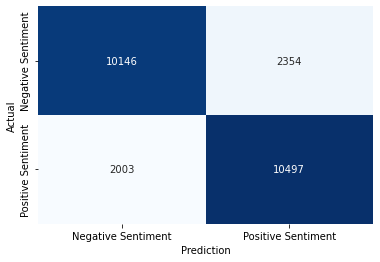

In [13]:
y_test_pred = (RMSprop_model.predict(X_test_padded) > 0.5).astype("int32")
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Negative Sentiment', 'Positive Sentiment'], yticklabels=['Negative Sentiment', 'Positive Sentiment'], cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

From the confusion matrix, we can see that most of the testing data was classified correctly, with the number of true negatives and true positives at around 82.57%. In other words, our model is 82.98% accurate at predicting sentiment for movie reviews. 

Let's take a look at some of the wrongly classified samples, and see where the model got it wrong. The following code captures the index of the wrongly classified samples:

In [14]:
false_negatives = []
false_positives = []
for i in range(len(y_test_pred)):
    if y_test_pred[i][0] != y_test[i]:
        if y_test[i] == 0: # False Positive
            false_positives.append(i)
        else:
            false_negatives.append(i)

In [15]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3

# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()

# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with sequence
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"


In [24]:
# Decode the first sequence in the dataset
false_positives_review = " ".join(inverted_word_index[i] for i in X_test_padded[false_positives[99]])
false_positives_review

"that i didn't make it to the end of either of the last 2 episodes because i fell asleep i can only admit that i was watching the two main characters very closely and i could pick out some mannerisms that steve did while portraying the character that [OOV] did such an excellent job with so i must give credit for that as for karl portrayal simple dead meat can only say again that i was very disappointed only because i cared so much for the original [OOV] and like others have [OOV] my feelings for a truly great western"

Now, let's take a look at some false negatives:

In [25]:
# Decode the first sequence in the dataset
false_negative_review = " ".join(inverted_word_index[i] for i in X_test_padded[false_negatives[99]])
false_negative_review

"pick up but in the middle of the movie the drag hurts the overall film's quality in a half hour tv show this isn't a problem but with film length celluloid it's inevitable that boredom will ensue at some point after awhile the gross crap just becomes br br on the whole though number two is an entertaining imaginative and above all disgusting comedy that will leave you with a feeling of pain [OOV] and hilarity go see it if you must but hey if you know you don't like this kind of stuff don't bother you'll just be disappointed"

## Summary

In this project, we created an LSTM-based neural network that can predict the sentiment of movie reviews. During the model training process, we use three models: sgd optimizer, RMSprop optimizer, and Adam optimizer. From the three models, we found that RMSprop optimizer is the most optimal for this dataset and the LSTM network. Based on the confusion matrix, it is found that our model is 82.57% accurate at predicting sentiment for movie reviews.